<a href="https://colab.research.google.com/github/Rahuldeshmukh142/AlmaBetter-Projects/blob/main/Transport__demand_prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [121]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# dataset       
dataset = pd.read_csv(r'/content/drive/MyDrive/AlmaBetter ML Regression Project/train_revised.csv',encoding='latin1')
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
# checking last rows of data
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


### **Understanding The data**

In [5]:
dataset.shape   #checking shape of data having 51645 observations with 10 variables

(51645, 10)

In [6]:
dataset.info()   ### Checking information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
dataset.describe(include='object')   # discriptive statistics for data

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,WOVIRJ8ZOD,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### **Summary:-**

* There are total **61** unique  seats in this dataset

* travelers have used 2 types of payment method and most of the people have used **Mpesa** to pay for their ticket.

* The record of 149 days out of 2 year is present in this dataset.


* There are 2 different types of car and most of them are bus.


In [8]:
dataset.isnull().sum()     #Checking null values if any

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

We don't see any null values in the dataset now.

so let us explore the dataset more.

In [9]:
len(dataset['ride_id'].unique())

6249

We see there are 6249 unique `ride_id`.

In [10]:
column = dataset.columns

In [11]:
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

### **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


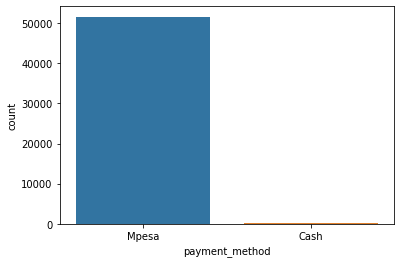

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


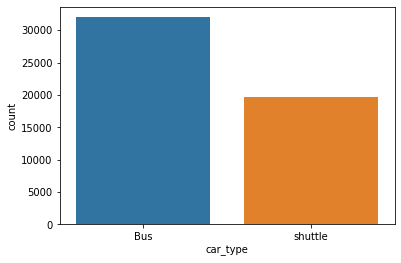

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


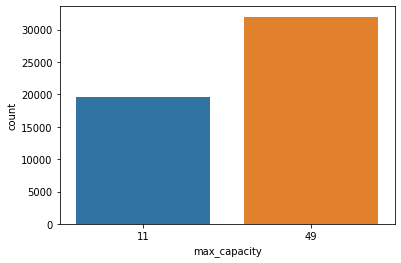

In [12]:
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(dataset[plots])
  plt.show()

### **Summary**

* There are two type of payment methods people have used to buy the tickets.

* There are two type of cars `Bus` and `shuttle` and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.

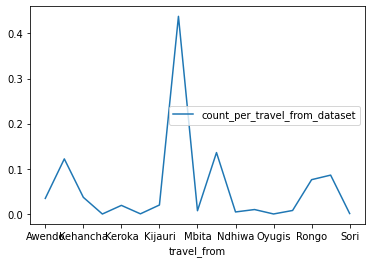

In [13]:
# ### Pattern of Traffic Flow 

count=(dataset.groupby(["travel_from"]).ride_id.count().rename("count_per_travel_from_dataset")/len(dataset)).reset_index()
count.plot(x="travel_from",y=["count_per_travel_from_dataset"])

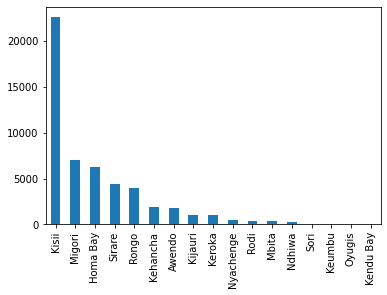

In [14]:
dataset['travel_from'].value_counts().plot(kind='bar')
plt.show()

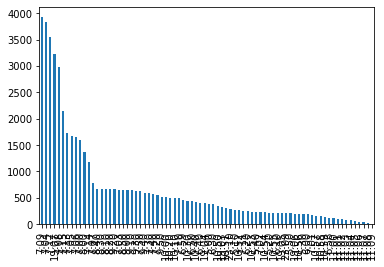

In [15]:
dataset['travel_time'].value_counts().plot(kind='bar')
plt.show()

In [16]:
dataset.corr()

,ride_id,max_capacity
ride_id,1.000000,0.295902
max_capacity,0.295902,1.000000


### **Finding Our Target Variable**

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each `ride_id` and that will be the `number_of_ticket` as our target variable.

In [17]:
label=dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


#### Now we found our target variable so let us delete the duplicate values from `ride_id` 

In [18]:

dataset=dataset.drop_duplicates("ride_id")

In [19]:
dataset.shape

(6249, 10)

Now let us merge two datasets on `ride_id` key to make the final dataset where we have dependent as well as independent variables too.

In [20]:

dataset = dataset.merge(label, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [21]:
dataset = dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [22]:

# X = dataset.drop('number_of_ticket', axis=1)
# y = dataset['number_of_ticket']

### **Removing Constant Features**

We need to first remove the constant features. 

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
dataset.drop(["travel_to"],axis=1,inplace=True)


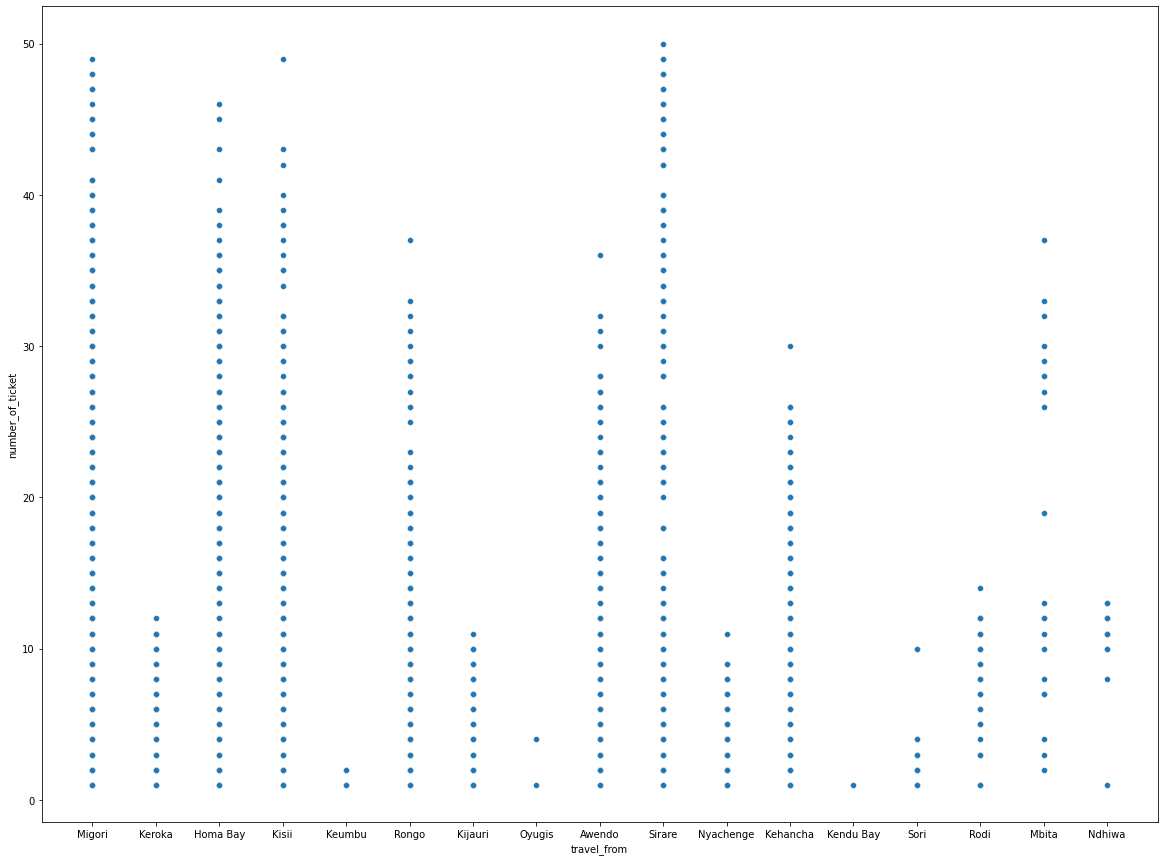

In [25]:
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=dataset)

### **Feature Engineering**

In [26]:
#concatinate travel date and travel time column and make a new feature called date.
dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]


In [27]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [28]:
dataset_new = time_features(dataset)

In [29]:
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


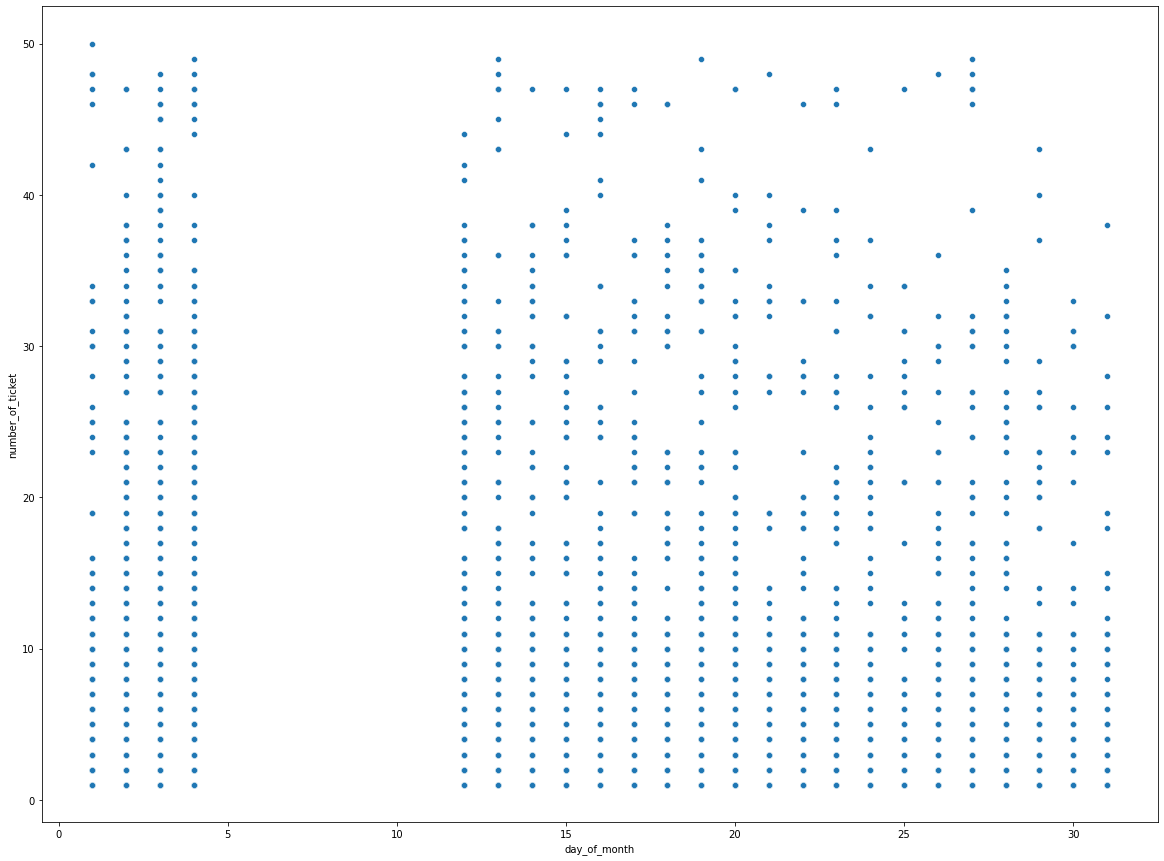

In [30]:
#visualization of day_of_month & number_of_ticket using scaterplot
plt.figure(figsize=(20, 15))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=dataset)


### **Summary**

* We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.


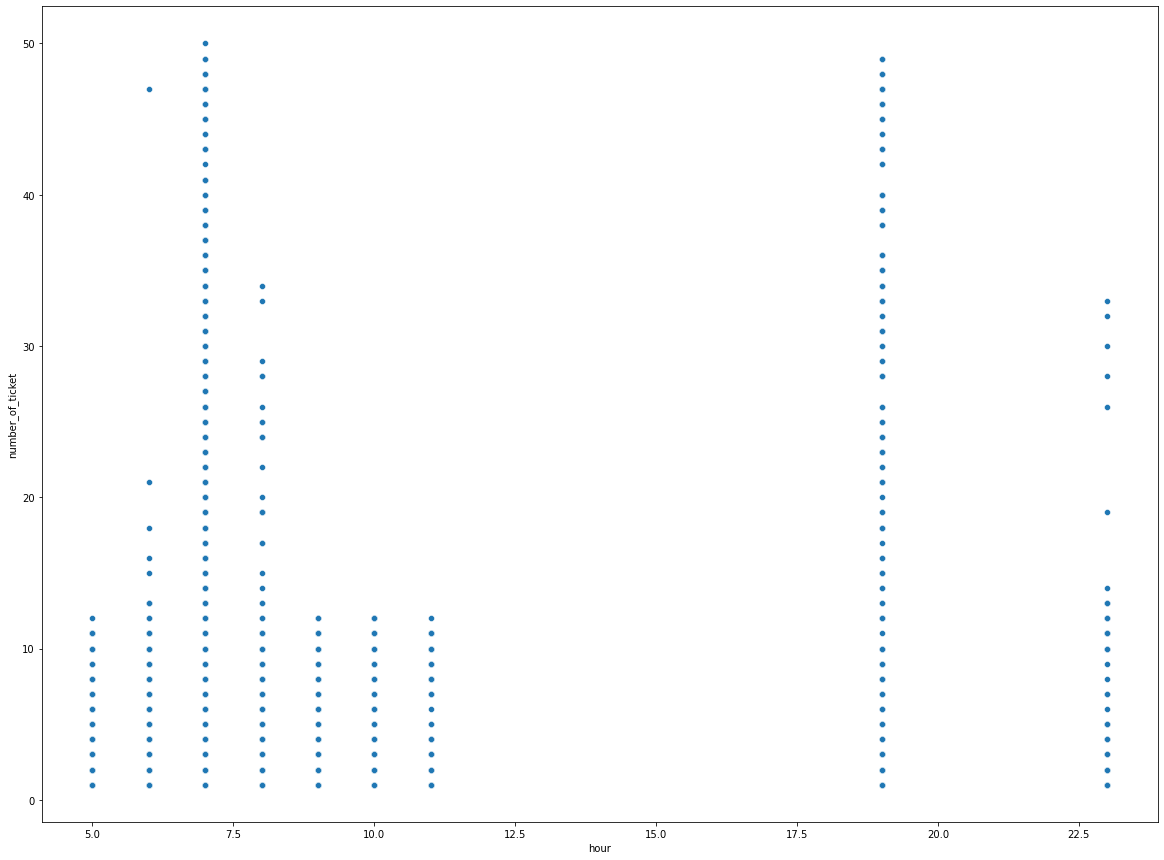

In [31]:
#visualization of hour & number_of_ticket using scaterplot
plt.figure(figsize=(20, 15))

sns.scatterplot(x='hour', y="number_of_ticket", data=dataset)

### **Summary**
* We can see that most of the ticktes were sold at  7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

* From the above we can say that there is not ride between 12pm to 5.30Pm 

In [32]:
# Calculating total travel time

dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [33]:
# splitting time period into AM, MID, Evening & PM

dataset_new['period'] = np.nan

dataset_new.loc[dataset_new.travel_time < 7, 'period'] = 'em'
dataset_new.loc[(dataset_new.travel_time >= 7) & (dataset_new.travel_time < 11), 'period'] = 'am'
dataset_new.loc[(dataset_new.travel_time >= 11) & (dataset_new.travel_time < 15), 'period'] = 'mid'
dataset_new.loc[(dataset_new.travel_time >= 15) & (dataset_new.travel_time < 19), 'period'] = 'eve'
dataset_new.loc[(dataset_new.travel_time >= 19) & (dataset_new.travel_time <= 24), 'period'] = 'pm'


pcount = dict(dataset_new['period'].value_counts())
pcount


dataset_new['hourly_travelers'] = np.log1p(dataset_new['period'].map(pcount))



dcount = dict(dataset_new["day_of_year"].value_counts())
dataset_new["daily_travelers"] = np.log1p(dataset_new["day_of_year"].map(dcount))
dataset_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [34]:
dataset_new.columns    ##Checking the columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [35]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [36]:
transport_dataset=dataset_new.copy()

In [37]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [38]:
transport_dataset.shape    #checking shape of data having 6249 observations with 21 variables

(6249, 21)

In [39]:
transport_dataset.month.value_counts()    #checking total number travelers in a month

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [40]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)
  

In [41]:
transport_dataset.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [42]:
transport_dataset.day_of_month.unique()    # checking unique days 

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [43]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [44]:
transport_dataset['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [45]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,3,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,3,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,3,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [46]:

# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [47]:
data = find_difference_bw_bus(transport_dataset)

In [48]:
data.isnull().sum()         ## Checking null values

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket                  0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         1
Time_gap_btw_0_1_previous_bus     1
Time_gap_btw_0_2_next_bus         3
Time_gap_btw_0_2_previous_bus     3
Time_gap_btw_0_3_next_bus         3
Time_gap_btw_0_3_previous_bus     3
Time_gap_btw_next_previous_b

We see that there are some null values present in the dataset so let us reomove those null values

In [49]:
data.dropna(inplace=True)


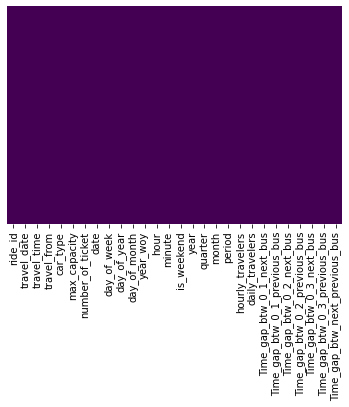

In [50]:
### finding the null values with the help of heatmap

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [51]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,1,201719,7,8,0,2017,2,3,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,1,20181,7,8,0,2018,1,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,1,20181,7,12,0,2018,1,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,1,20181,7,13,0,2018,1,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,1,20181,8,0,0,2018,1,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


In [52]:
#importing required libraries
from datetime import datetime
from datetime import timedelta

Now let us find the distance of each origin point from the distination point.




In [53]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [54]:
##Finding the travel time of each origin point from the distination point.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [55]:
#Finding Speed of travel
data["Speed"]=data.travel_from_time/data.travel_from_distance

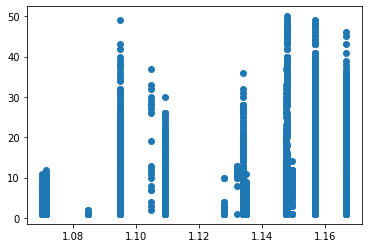

In [56]:
# plot Speed & number of tickets
plt.scatter(data['Speed'],data['number_of_ticket'])

In [57]:

time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

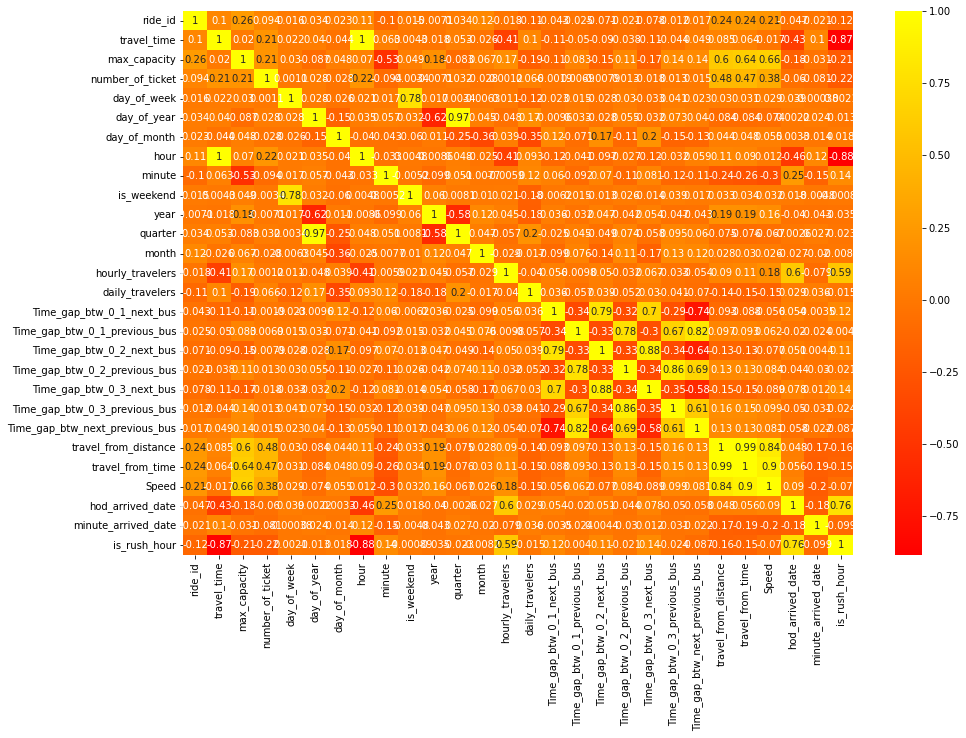

In [58]:
fig, ax = plt.subplots(figsize=(15,10))# checking the correlation so that we can decide which many variables are important.
sns.heatmap(data.corr(), annot= True, cmap= "autumn",ax=ax)
# plt.figure(figsize=(10,8))

### **Encoding Categorical features**

In [59]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)


In [60]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,hour,minute,is_weekend,year,quarter,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,7,8,0,2017,2,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,7,8,0,2018,1,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,7,12,0,2018,1,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,351.0,398,1.133903,13,50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,7,13,0,2018,1,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,351.0,398,1.133903,13,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,8,0,0,2018,1,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,351.0,398,1.133903,14,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### ..

### Training the models

In [61]:

keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]


In [62]:
features = data.drop(not_used_cols,axis=1).columns

In [63]:
features.shape

(44,)

In [64]:
## importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [65]:
data[features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,351.0,398,1.133903,13,50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,351.0,398,1.133903,13,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,351.0,398,1.133903,14,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### **Linear Regression**

In [66]:
used_cols = ['day_of_year']

In [67]:
prev_adjR2 = -0.01177282976168792
for col in features:
      used_cols.append(col)
dataset_pr = data[used_cols]

In [68]:
dataset_pr.head()


,day_of_year,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus,travel_from_distance,travel_from_time,Speed,hod_arrived_date,minute_arrived_date,is_rush_hour,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,132,1,4,132,7,8,0,2017,2,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5530,4,1,3,4,7,8,0,2018,1,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667,351.0,398,1.133903,13,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5533,4,1,3,4,7,12,0,2018,1,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333,351.0,398,1.133903,13,50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5539,4,1,3,4,7,13,0,2018,1,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000,351.0,398,1.133903,13,51,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5528,4,1,3,4,8,0,0,2018,1,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667,351.0,398,1.133903,14,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [69]:
dataset_pr=dataset_pr.loc[:,~dataset_pr.columns.duplicated()]

In [70]:
dataset_pr.shape

(6246, 44)

In [71]:
import math
from sklearn.linear_model import LinearRegression

In [72]:
## define Matrix
def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('RMSE is {}'.format(r2_score(actual, predicted)))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [73]:
# used_cols = ['day_of_year']
# prev_adjR2 = -0.01177282976168792
# for col in features:
#       used_cols.append(col)
# dataset_pr = data[used_cols]
X= dataset_pr.copy()
y = data['number_of_ticket']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
  # Predicting 
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

Adjust_r2: 0.34374880042054523
Train score: 0.41768626024398003
Test score: 0.3591652728078897
0.3591652728078897
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'travel_from_time',
 'Speed',
 'hod_arrived_date',
 'minute_arrived_date',
 'is_rush_hour',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2',
 'month_3']

In [74]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 49.14022953760802
RMSE is 7.010009239480931
RMSE is 0.3591652728078897
MAE is 4.78509524668792
MAPE is 165.88226808278569


### **Implementing Lasso Regression**

In [75]:
from sklearn.linear_model import Lasso


In [76]:
X= data[used_cols].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
    lasso  = Lasso(alpha=alpha , max_iter= 3000)
    lasso.fit(X_train, y_train)
    print('alpha: ',alpha)
    print('test Score: ',lasso.score(X_test, y_test))
    print('train Score: ',lasso.score(X_train, y_train))



alpha:  0.01
test Score:  0.3550990281220633
train Score:  0.41918413716760705
alpha:  0.025
test Score:  0.35335828829272087
train Score:  0.41485643892518664
alpha:  0.5
test Score:  0.2658629204617722
train Score:  0.2844172725323555
alpha:  0.75
test Score:  0.25585437193900396
train Score:  0.27040774153973046
alpha:  1
test Score:  0.2555546872624288
train Score:  0.26959284549419515


We see that at alpha = 0.01 it give best out of those 


In [77]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [78]:
y_test_pred = lasso.predict(X_test)

print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 48.39919482575655
RMSE is 6.956952984299703
MAE is 4.760900808209845


### **Ridge Regression**

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [80]:
# Hyperprarameter tuning

X= data[features].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [81]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -44.97449113861214


In [82]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

print_metrics(y_test, y_test_pred)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-43.02051587042878
-48.38009063187631
MSE is 48.39919482575655
RMSE is 6.956952984299703
RMSE is 0.3550990281220633
MAE is 4.760900808209845
MAPE is 165.13654741661844
R2 : 0.355353584282443
Adjusted R2 :  0.34129089598716666


### **Training Gradient Boosting Regressor**

In [83]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
    used_cols.append(col)
    dataset_pr = data[used_cols]
    X= dataset_pr.copy()
    y = data['number_of_ticket']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
  # Predicting 
    y_pred = reg.predict(X_test)
    y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
    adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    if prev_adjR2<adj_r2:
        prev_adjR2 = adj_r2
 #Find R-squared value
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print_metrics(y_test, y_pred)
print('Important features are: \n')
used_cols

Adjust_r2: 0.6043208710296528
Train score: 0.6877626695420473
Test score: 0.6129601533215818
r2_Test score: 0.6129601533215818
r2_train score: 0.6877626695420473
MSE is 29.04696652909568
RMSE is 5.38952377572413
RMSE is 0.6129601533215818
MAE is 3.5350769222398517
MAPE is 114.11047507701424
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'travel_from_time',
 'Speed',
 'hod_arrived_date',
 'minute_arrived_date',
 'is_rush_hour',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2']

### **Training XGboost**

In [84]:
data[used_cols].columns

Index(['day_of_year', 'car_type', 'day_of_week', 'day_of_year', 'hour',
       'minute', 'is_weekend', 'year', 'quarter', 'hourly_travelers',
       'daily_travelers', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'travel_from_distance', 'travel_from_time', 'Speed', 'hod_arrived_date',
       'minute_arrived_date', 'is_rush_hour', 'travel_from_Awendo',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Keroka',
       'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa',
       'travel_from_Nyachenge', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'day_of_month_1',
       'day_of_month_2', 'day_of_month_3', 'month_1', 'month_2'],
      dtype='ob

In [85]:
import xgboost as xgb

X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.8961932882441246
Test score: 0.6536160793420493


0.8961932882441246

In [86]:
#Importing required libraries
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Random Forest Regressor**

In [87]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [88]:
dec_reg =RandomForestRegressor()

In [89]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
dec_reg.score(X_train,y_train)

0.9503927269780722

In [91]:
dec_reg.score(X_test,y_test)

0.6453651761918102

Model seems to be overfitted. 


### **grid search cv on Random forest**

In [92]:
##defining Parameters
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [93]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
dec_reg =RandomForestRegressor()
rf_grid =GridSearchCV(dec_reg,param_grid=parameters, verbose=1,cv=2)
rf_grid.fit(X, y)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [94]:
rf_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)
train_score= rf_optimal_model.score(X_train,y_train)
test_score = rf_optimal_model.score(X_test,y_test)



#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)
r2_train = r2_score(y_train, rf_train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.6181103726084598
Test Score:  0.6152803250604278
Mean Squared Error (MSE):  28.87283988188251
Mean Absolute Error (MAE):  3.457970415952578
Root Mean Squared Error (MSE):  5.373345315711853
R2 Score:  0.6152803250604278
R2_train Score:  0.6181103726084598
Adjusted R2 Score:  0.6068878284330896


In [96]:
import warnings
warnings.filterwarnings('ignore')

### **Grid Search CV on XGboost algorithm**

In [97]:
## import required libraries
import xgboost as xgb
from xgboost import XGBRegressor
xgb = xgb.XGBRegressor()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [98]:
# Prameters
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [99]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[08:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:54] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [100]:
np.any(np.isinf(X))

False

In [101]:
np.all(np.isinf(X))

False

In [102]:
print(np.all(np.isinf(X)))

False


In [103]:
reg_gs

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [104]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)

In [105]:
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[08:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:10] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [106]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [107]:
reg_optimal_model =reg_gs.best_estimator_

In [108]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [109]:
reg_optimal_model.score(X_train,y_train)

0.8455945271768708

In [110]:
reg_optimal_model.score(X_test,y_test)

0.8421125457491907

In [111]:
#Find R-squared value
r2_test = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [112]:
adj_r2

0.838668297862708

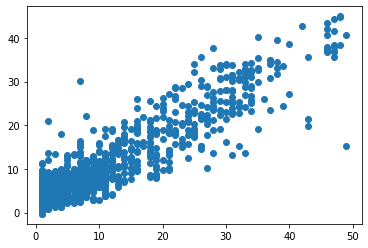

In [113]:
plt.scatter(y_test,test_preds)

In [114]:
importances = reg_optimal_model.feature_importances_

In [115]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [116]:
importance_df = pd.DataFrame(importance_dict)

In [117]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [118]:
imp_features = important_features['Feature'].tolist()

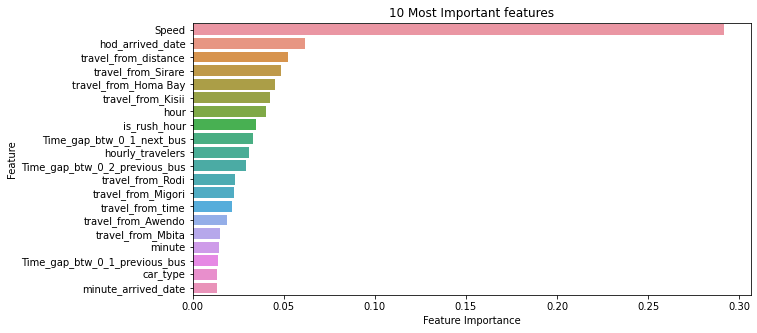

In [119]:
##Plotting the feature importance score 

plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

Evaluating Model

In [120]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2)
print('Adjusted R2 Score: ',adj_r2)

Mean Squared Error (MSE):  11.849300888127685
Mean Absolute Error (MAE):  2.2667203277465098
Root Mean Squared Error (MSE):  3.442281349356511
R2 Score:  0.6152803250604278
Adjusted R2 Score:  0.838668297862708


## Conclusion

We used different types of regression algorithms to train our model like Linear Regression, Regularized linear regression (Ridge and Lasso), GBM, Random Forest Regressor, XGboost regressor. And also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.
So the accuracy of our best model is 84% which can be said to be good for this large dataset. . This performance could be due to various reasons like  no proper pattern of data, too much data,and  not enough relevant features.